### 프로그램 애플리케이션 확장하기

 - 지금까지 웹 사이트 제작 단계를 모두 마쳤다
 
 - 모델, url, 뷰와 템플릿을 만드는 방법을 알게 되었다
 
 - 웹 사이트를 예쁘게 꾸미는 방법도 알게 되었다

 - 이번에는 블로그 게시글이 각 페이지마다 보이게 만들어보자

 - 이미 앞에서 Post모델을 만들었으니 models.py에 새로 추가할 내용은 없다
 
 > **NOTE** 우리는 게시물에 대한 객체를 사용할 뿐 변경할 것이 없기 때문에 `models.py`에 추가적으로 작업할 것이 없는 것이다. 만약 `post` 모델에 대하여 댓글이나 다른 기능을 추가한다면 `models.py`를 바꾸어야할지도 모르겠다
 
### Post에 템플릿 링크 만들기

 - `blog/templates/blog/post_list.html` 파일에 링크를 추가하는 것부터 시작하자
 
 - `post`제목 목록이 보이고 해당 링크를 클릭하면, `post`상세 페이지로 이동하게 만들어 볼 것이다
 
 - `<h1><a href="">{{ post.title }}</a></h1>`부분을 아래와 같이 수정해보자
 
 `<h1><a href="{% url 'post_detail' pk=post.pk %}">{{ post.title }}</a></h1>`
 
 - `{% url 'post_detail' pk=post.pk %}`은 어떤 의미일까?
 
 - `{% %}`는 장고 템플릿 태그을 말한다
 
 - 이제 URL를 생성해 사용해보자
 
 - `blog.views.post_detail`는 `post_detail` *뷰* 경로이다
 
 - `blog`는 응용프로그램(디렉터리 `blog`)의 이름인 것을 꼭 기억하자
 
 - `views`는 `views.py`파일명이다
 
 - 마지막 부분 `post_detail`는 `view` 이름입니다.
 
 - `pk = post.pk`이란 무엇일까?
 
 - `pk`는 데이터베이스의 각 레코드를 식별하는 *기본키(Prmiary Key)* 의 줄임말이다
 
 - `Post` 모델에서 기본키를 지정하지 않았기 때문에 장고는 `pk`라는 필드를 추가해 새로운 블로그 게시물이 추가될 때마다 그 값이 1,2,3 등으로 증가하게 된다
 
 - `Post` 객체의 다른 필드 (제목, 작성자 등)에 액세스하는 것과 같은 방식으로 `post.pk`를 작성하여 기본 키에 액세스한다
 
 - `post.pk`를 써서 기본키에 접근할 수 있고 같은 방법으로 `Post`객체내 다른 필드(title, author)에도 접근할 수 있다
 
 - 이제 http://127.0.0.1:8000/ 를 열어보자
 
 - 아마 오류 메세지가 나타날 것이다. (아직 `post_detail` *뷰* 를 만들지 않아 오류가 발생한다)
 
 - 아래의 화면이 보일 것이다

In [1]:
from IPython.display import Image

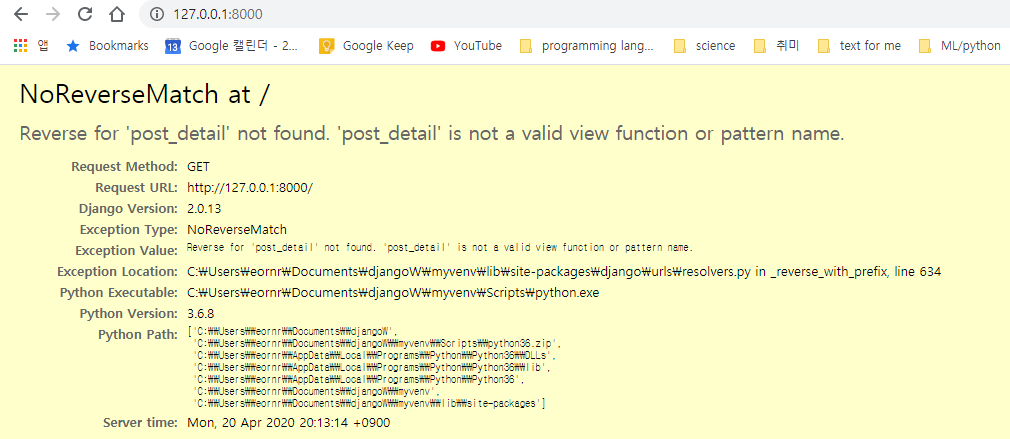

In [4]:
Image("img/24_img.png")

### Post 상세 페이지 URL 만들기

 - `post_detail` *뷰* 가 보이게 `urls.py`에 URL를 만들어 보자
 
 - 첫 게시물의 상세 페이지 URL이 `http://127.0.0.1:8000/post/1/`가 되게 만들 것이다
 
 - `blog/urls.py`파일에 URL을 만들어, 장고가 `post_detail` *뷰* 로 보내, 게시글이 보일 수 있게 해보자
 
 - `path('post/<int:pk>/', views.post_detail, name='post_detail')`코드를 `blog/urls.py`파일에 추가하면 아래와 같이 보일 것이다

In [ ]:
# blog/urls.py

from django.urls import path
from . import views

urlpatterns = [
    path('', views.post_list, name='post_list'),
    path('post/<int:pk>/', views.post_detail, name='post_detail'),
]

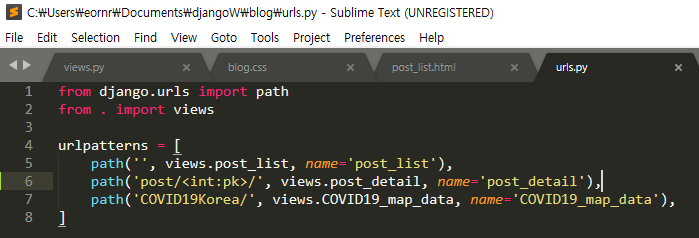

In [5]:
Image("img/25_img.png")

 - 여기서 `post/<int:pk/>/`는 URL 패턴을 나타낸다

 - `post/`란 URL이 `post` 문자를 포함해야 한다는 것을 말한다
 
 - `<int:pk>`는 조금 까다로운데, 장고는 정수 값을 기대하고 이를 pk라는 변수로 뷰로 전송하는 것을 말한다
 
 - `/`은 다음에 `/` 가 한 번 더 와야 한다는 의미이다
 
 - 브라우저에 `ttp://127.0.0.1:8000/post/5/` 라고 입력하면, 장고는 `post_detail` 뷰를 찾아 매개변수 `pk`가 `5`인 값을 찾아 뷰로 전달한다

 - 이제 새로운 URL 패턴을 `blog/urls.py`에 추가했다
 
 - 페이지를 새로고침 하자
 
 - `http://127.0.0.1:8000/`에서 또 에러가 발생했다
 
 - 이유는 *뷰*를 추가하지 않았기 때문이다

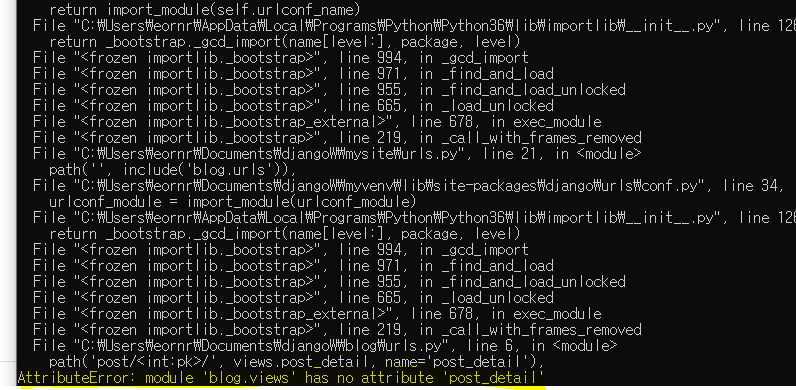

In [6]:
Image("img/26_img.png")

### Post 상세 페이지 내 뷰 추가하기

 - *뷰* 에 매개변수 `pk`를 추가해보자
 
 - *뷰* 가 `pk`를 식별해야한다
 
 - 그래서 함수를 `def post_detail(request, pk):`라고 정의하자
 
 - `urls(pk)`과 동일하게 이름을 사용해야 한다
 
 - 변수가 생략되면 오류가 발생할 것이다

 - 블로그 게시글 한 개만 보려면, 아래와 같이 쿼리셋(queryset)을 작성해야한다

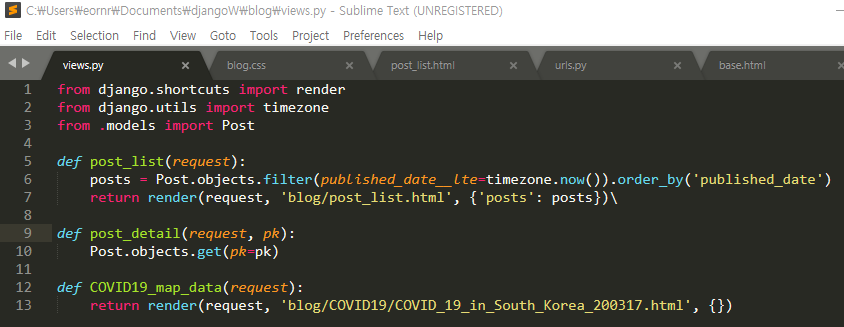

In [7]:
Image("img/27_img.png")

 - http://127.0.0.1:8000/post/10/ 로 접속을 시도하면 다시 에러를 볼 수 있다

 - 장고에는 이를 해결하기 위해 `get_object_or_404`라는 특별한 기능을 제공한다
 
 - `pk`에 해당하는 `Post`가 없을 경우, 멋진 페이지(페이지 찾을 수 없음 404 : Page Not Found 404)를 보여줄 것이다

 - 나중에 페이지 찾을 수 없음(Page not found)페이지를 예쁘게 만들 수 있다

 - 지금 당장 중요한 것이 아니니 이 부분은 생략하자

 - 이제 `views.py`파일에 새로운 *뷰* 를 추가합시다!

 - `blog/urls.py`파일에서 `views.post_detail`라는 뷰를 `ost_detail`이라 이름을 붙이도록 URL 법칙을 만들었다
 
 - 이는 장고가 `post_detail`이라는 이름을 해석할 때, `blog/views.py`파일 내부의 `post_detail`이라는 *뷰* 함수로 이해하도록 해준다

 - `blog/views.py`파일을 열고, `from`으로 시작하는 행에서 다음과 같이 코드를 추가하자

In [ ]:
# views.py

from django.shortcuts import render
from django.utils import timezone
from .models import Post
from django.shortcuts import render, get_object_or_404

def post_list(request):
    posts = Post.objects.filter(published_date__lte=timezone.now()).order_by('published_date')
    return render(request, 'blog/post_list.html', {'posts': posts})\

def post_detail(request, pk):
    Post.objects.get(pk=pk)
    return render(request, 'blog/post_detail.html', {'post': post})

def COVID19_map_data(request):
    return render(request, 'blog/COVID19/COVID_19_in_South_Korea_200317.html', {})

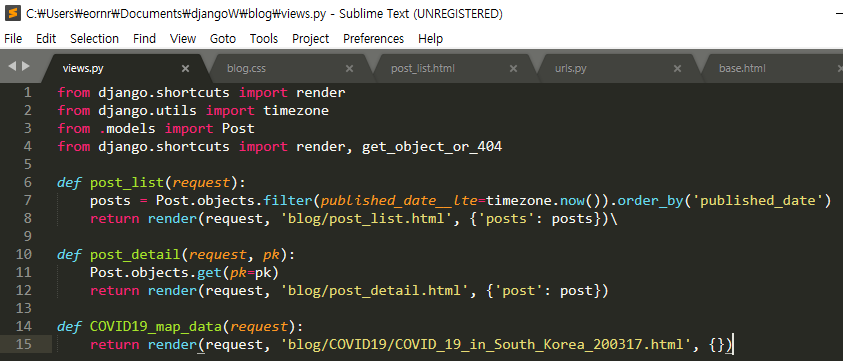

In [8]:
Image("img/28_img.png")

 - 메인 웹 페이지는 정상적으로 동작하지만, 글 제목을 클릭하여 링크로 들어가게 되면 아래와 같은 오류를 확인할 수 있다

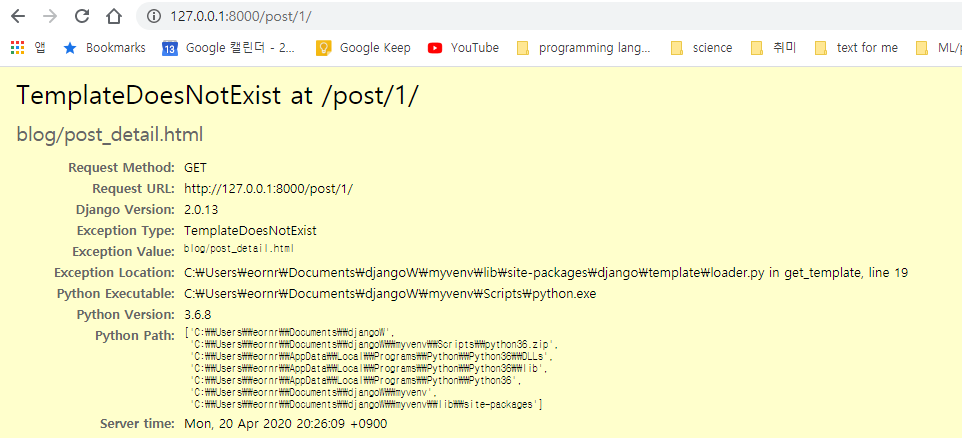

In [9]:
Image("img/29_img.png")

### Post 상세 페이지 템플릿 만들기

 - `blog/templates/blog` 디렉터리 안에 `post_detail.html`라는 새 파일을 생성하고 아래와 같이 코드를 작성하자
 
```
{% extends 'blog/base.html' %}

{% block content %}
    <div class="post">
        {% if post.published_date %}
            <div class="date">
                {{ post.published_date }}
            </div>
        {% endif %}
        <h1>{{ post.title }}</h1>
        <p>{{ post.text|linebreaksbr }}</p>
    </div>
{% endblock %}
```

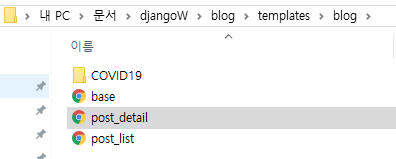

In [10]:
Image("img/30_img.png")

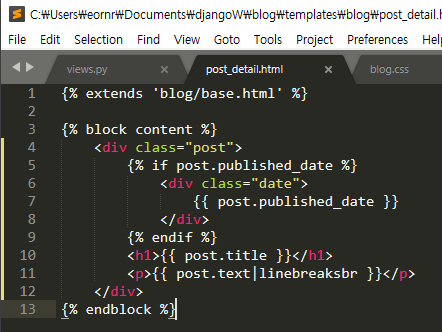

In [11]:
Image("img/31_img.png")

 - 다시 한 번 `base.html`을 확장한 것이다
 
 - `content`블록에서 블로그 글의 게시일, 제목과 내용을 보이게 만들었다

 - 가장 중요한 부분은 `{% if ... %} ... {% endif %}`라는 템플릿 태그인데, 내용이 있는지 확인할 때 사용한다
 
 - `post`의 게시일(`published_date`)이 있는지, 없는지를 확인한다

 - 페이지를 새로고침하면 페이지 찾을 수 없음(`Page not found`) 페이지가 없어졌음을 볼 수 있다

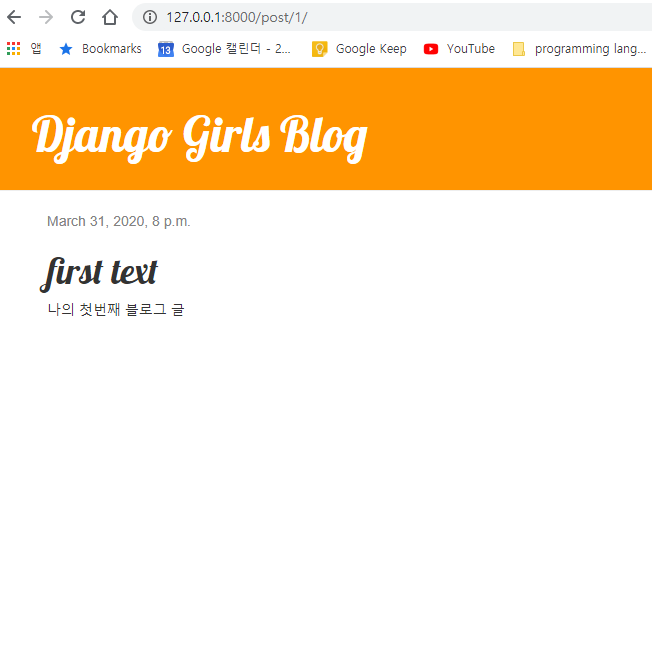

In [12]:
Image("img/32_img.png")